In [469]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plta

In [470]:
df = pd.read_csv(r'C:\Users\omadi\Desktop\ML\books.csv')
df.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


In [471]:
df.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


In [472]:
df.shape

(350, 5)

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [474]:
df.isna().sum()

name      0
author    0
rating    0
year      0
genre     0
dtype: int64

In [475]:
df['genre'].unique()

array(['Non Fiction', 'Fiction', 'Childrens'], dtype=object)

# Replace Function To Replace Ctaegorical Data To Numerical Data

In [476]:
df['genre']=df['genre'].replace('Non Fiction',0)
df['genre']=df['genre'].replace('Fiction',1)
df['genre']=df['genre'].replace('Childrens',2)

C:\Users\omadi\AppData\Local\Temp\ipykernel_4872\3665802224.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['genre']=df['genre'].replace('Childrens',2)


In [477]:
df.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,0
1,11/22/63: A Novel,Stephen King,4.6,2011,1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,0
3,1984 (Signet Classics),George Orwell,4.7,2017,1
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,2


# LabelEncoder

In [478]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
df['name']=lbl_encoder.fit_transform(df['name'])

In [479]:
df.head()

,name,author,rating,year,genre
0,0,JJ Smith,4.7,2016,0
1,1,Stephen King,4.6,2011,1
2,2,Jordan B. Peterson,4.7,2018,0
3,3,George Orwell,4.7,2017,1
4,4,National Geographic Kids,4.8,2019,2


In [480]:
df['author']=lbl_encoder.fit_transform(df['author'])

# Data Sampling

In [481]:
df['genre'].value_counts()

genre
0    179
1    131
2     40
Name: count, dtype: int64

In [482]:
#Random Sampling
non_fiction = df[df['genre']==0]
fiction = df[df['genre']==1]
children = df[df['genre']==2]
print(non_fiction.shape)
print(fiction.shape)
print(children.shape)


(179, 5)
(131, 5)
(40, 5)


In [483]:
non_fiction_sample=non_fiction.sample(n=40)
fiction_sample=fiction.sample(n=40)

In [484]:
sampled_df = pd.concat([non_fiction_sample,fiction_sample,children],axis=0)

In [485]:
sampled_df.shape

(120, 5)

# Corelation Of Dataframe

In [486]:
X = sampled_df.drop('genre',axis=1)
y = sampled_df['genre']

In [487]:
X.head()

,name,author,rating,year
119,114,212,4.7,2015
32,32,226,4.7,2015
214,214,168,4.3,2011
336,336,191,4.7,2014
56,56,10,4.5,2013


In [488]:
print(X.shape)
print(y.shape)

(120, 4)
(120,)


In [489]:
df.corr()

,name,author,rating,year,genre
name,1.000000,0.135285,-0.000824,-0.097172,0.020772
author,0.135285,1.000000,0.034060,-0.168832,-0.010485
rating,-0.000824,0.034060,1.000000,0.220153,0.160181
year,-0.097172,-0.168832,0.220153,1.000000,0.078553
genre,0.020772,-0.010485,0.160181,0.078553,1.000000


In [490]:
from sklearn.feature_selection import mutual_info_classif
#determine the mutual info
mutual_info = mutual_info_classif(X,y)
print(mutual_info)

[0.11727397 0.2720896  0.13167734 0.01383538]


In [491]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

author    0.272090
rating    0.131677
name      0.117274
year      0.013835
dtype: float64

<Axes: >

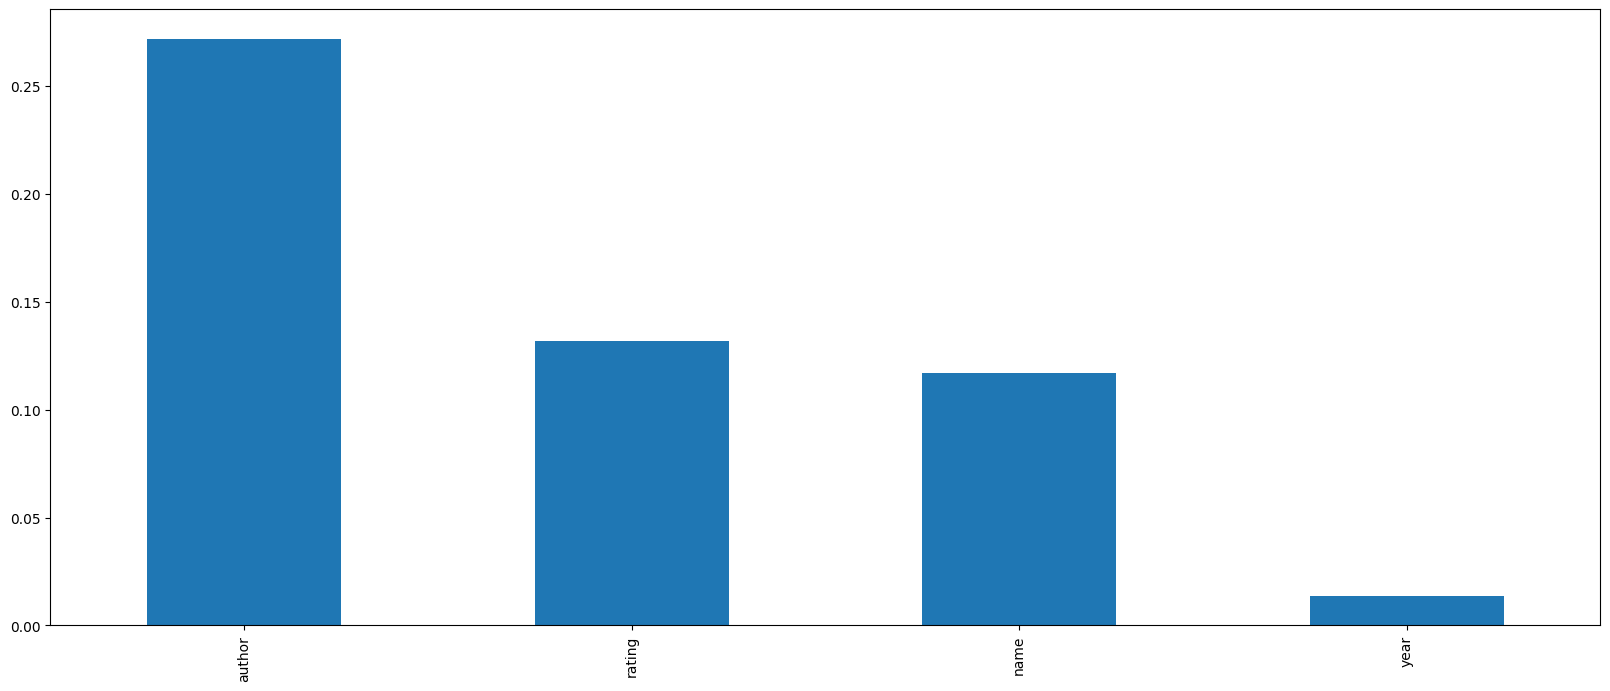

In [492]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [493]:
X = sampled_df.drop(['year','genre'],axis=1)

In [494]:
X

,name,author,rating
119,114,212,4.7
32,32,226,4.7
214,214,168,4.3
336,336,191,4.7
56,56,10,4.5
...,...,...,...
327,327,51,4.5
331,331,216,4.8
337,337,73,4.7
343,343,162,4.8


# Train Test Split

In [495]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [496]:
print('X Training : ',X_train.shape)
print('X Testing : ',X_test.shape)
print('y Training : ',y_train.shape)
print('y Testing : ',y_test.shape)

X Training :  (96, 3)
X Testing :  (24, 3)
y Training :  (96,)
y Testing :  (24,)


# Data Scaling

In [497]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train_std = scalar.fit_transform(X_train)
X_test_std = scalar.transform(X_test)


In [498]:
X_train_std

array([[-0.51562356, -0.10956297,  1.16471339],
       [-0.13331144,  0.52440139,  0.70076117],
       [-1.36626802, -1.50716621, -0.22714328],
       [ 1.35770582, -0.55621968,  1.16471339],
       [ 0.83202666, -1.49275793,  0.70076117],
       [-0.69722182, -0.3112789 ,  0.70076117],
       [-0.16198485,  1.36008168, -0.6910955 ],
       [ 0.87025787,  1.50416449,  0.23680895],
       [-1.30892121, -1.24781716,  0.23680895],
       [-0.93616689, -0.008705  ,  0.70076117],
       [ 1.19522317,  1.08632434,  0.70076117],
       [ 0.93716249, -0.9164267 , -1.15504772],
       [ 0.98495151,  1.38889824,  0.70076117],
       [-0.09508023, -1.2190006 , -0.6910955 ],
       [ 1.65399772,  0.59644279,  0.70076117],
       [ 0.11519144,  1.36008168, -0.6910955 ],
       [-1.50007727,  1.44653137, -0.22714328],
       [-1.2898056 , -0.28246234, -0.6910955 ],
       [ 0.71733303,  1.47534793,  0.23680895],
       [-1.21334318, -0.46976999,  0.23680895],
       [-0.59208598,  1.3456734 ,  1.164

# Modelling

In [499]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(25,),activation='relu',batch_size=10,verbose=True,max_iter=50,solver='sgd')

In [500]:
mlp

MLPClassifier(batch_size=10, hidden_layer_sizes=(25,), max_iter=50,
              solver='sgd', verbose=True)

In [501]:
mlp.fit(X_train_std,y_train)

Iteration 1, loss = 1.20005148
Iteration 2, loss = 1.18630174
Iteration 3, loss = 1.16815508
Iteration 4, loss = 1.15283711
Iteration 5, loss = 1.13926970
Iteration 6, loss = 1.12930235
Iteration 7, loss = 1.11949409
Iteration 8, loss = 1.11107512
Iteration 9, loss = 1.10410312
Iteration 10, loss = 1.09671517
Iteration 11, loss = 1.09197146
Iteration 12, loss = 1.08588976
Iteration 13, loss = 1.08164068
Iteration 14, loss = 1.07692171
Iteration 15, loss = 1.07351772
Iteration 16, loss = 1.07023980
Iteration 17, loss = 1.06544488
Iteration 18, loss = 1.06231613
Iteration 19, loss = 1.05910265
Iteration 20, loss = 1.05574458
Iteration 21, loss = 1.05242242
Iteration 22, loss = 1.04955012
Iteration 23, loss = 1.04675642
Iteration 24, loss = 1.04425162
Iteration 25, loss = 1.04187685
Iteration 26, loss = 1.03923736
Iteration 27, loss = 1.03707917
Iteration 28, loss = 1.03477112
Iteration 29, loss = 1.03238867
Iteration 30, loss = 1.03000081
Iteration 31, loss = 1.02808859
Iteration 32, los

c:\Users\omadi\anaconda3\envs\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=10, hidden_layer_sizes=(25,), max_iter=50,
              solver='sgd', verbose=True)

In [502]:
mlp.score(X_train_std,y_train)

0.5

In [503]:
mlp.score(X_test_std,y_test)

0.5